# (1) 准备函数 准备数据

In [134]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [135]:
def RVM(z,u,L,M):
    # RVM=RationalVandermontMatrix
    # z is complex type ndarray of dimension (N,)
    # u is complex type ndarray of dimension (N,)
    # L is int, degree of nominator
    # M is int, degree of denominator
    #return type: complex type ndarray of dimension (N,L+M+1)
    
    N=z.shape[0]
    output=np.ndarray(shape=(N,L+M+1), dtype=complex)
    
    for i in range(N):
        for j in range(M):
            output[i,j]=-u[i]*(z[i]**(j+1))
            
        for j in range(M,L+M+1):
            output[i,j]=z[i]**(j-M)

    return output

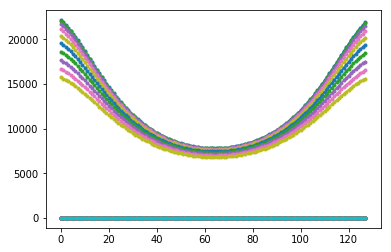

In [136]:
d=np.loadtxt("data3_best.txt")
s=np.loadtxt("data3_error.txt")
n0=128
n1=64
dd=np.resize(d,(n1,n0))
ss=np.resize(s,(n1,n0))
for i in range(10):
    plt.plot(dd[i,:],'.-')
    plt.plot(ss[i,:],'.-')
plt.show()

In [137]:
print(dd.shape)
print(ss.shape)

(64, 128)
(64, 128)


In [146]:
u=dd[11]
ue=ss[11]

GU=u[:64]
GZ=np.array(range(64))*1j/64

# (2) 先创立X=RVM(GZ,GU,L,M)  然后比较两种
## XT=np.linalg.pinv(X)   ab=np.matmul(XT ,GU)

## ab=np.linalg.lstsq(X,GU)

### 小结论：GZ=np.array(range(64))*1j/64 的构造 会影响

In [147]:
X=RVM(GZ,GU,12,12)

/home/jian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


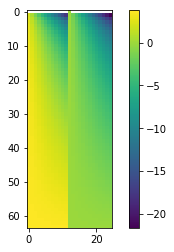

In [148]:
plt.imshow(np.log10(np.abs(X)))
plt.colorbar()

In [149]:
def nor2(L,M):
    X=RVM(GZ,GU,L,M) 
    #XT=np.linalg.pinv(X)
    #ab=np.matmul(XT ,GU)
    ab=np.linalg.lstsq(X,GU)[0]
    return np.log(np.linalg.norm(np.matmul(X,ab)-GU ) )

/home/jian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


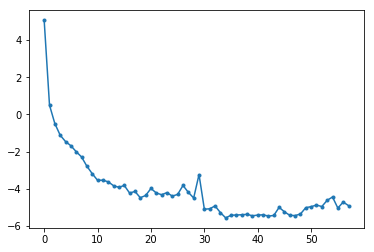

In [150]:
noor=[nor2(l,l) for l in range(2,60,1)]
plt.plot(noor,'.-')
plt.show()

# (3) 把z的系数每一行约化吸收到u里面，

## 我需要定义一种 residue number，矩阵本身。
## 另外，当矩阵变成长矩形之后，residue应该为0 机器精度，但是结果不是的。

# (4) 简单的任务：找到合适的L,M重新做计算。

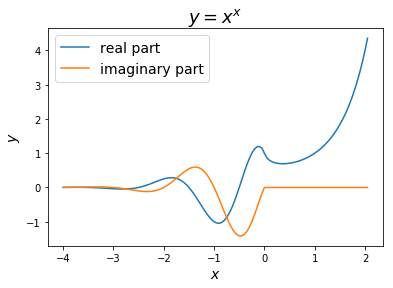

In [16]:
def f(x):
    return (x**x)
x=[i/20-4 for i in range(122)]
y=[f(i/20-4) for i in range(122)]
plt.plot(x,np.real(y),x,np.imag(y))
plt.title("$y=x^x$",fontsize=18)
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)
plt.legend(["real part","imaginary part"],fontsize=14)
plt.show()

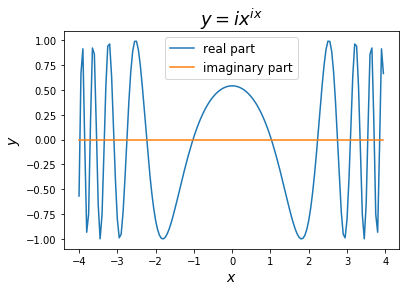

In [17]:

def f(x):
    return (np.cos(np.cos(x)))
x=[i/20-4 for i in range(160)]
y=[f( (i/20-4)*1j) for i in range(160)]
plt.plot(x,np.real(y),x,np.imag(y))
plt.title("$y=ix^{ix}$",fontsize=18)
plt.xlabel("$x$",fontsize=14)
plt.ylabel("$y$",fontsize=14)
plt.legend(["real part","imaginary part"],fontsize=12)
plt.show()